In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lugboot', 'safety', 'class']
df.columns=col_names

In [5]:
df

,buying,maint,doors,persons,lugboot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   lugboot  1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lugboot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [8]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lugboot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df[df.duplicated()]

,buying,maint,doors,persons,lugboot,safety,class


In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])
df['lugboot'] = oe.fit_transform(df[['lugboot']])

In [11]:
df

,buying,maint,doors,persons,lugboot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [12]:
df.dtypes

buying     float64
maint      float64
doors      float64
persons    float64
lugboot    float64
safety     float64
class      float64
dtype: object

In [13]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()

clf1.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [16]:
pred1 = clf1.predict(X_test)
pred1

array([0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 3., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 3., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2.

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1, y_test))

0.9653179190751445


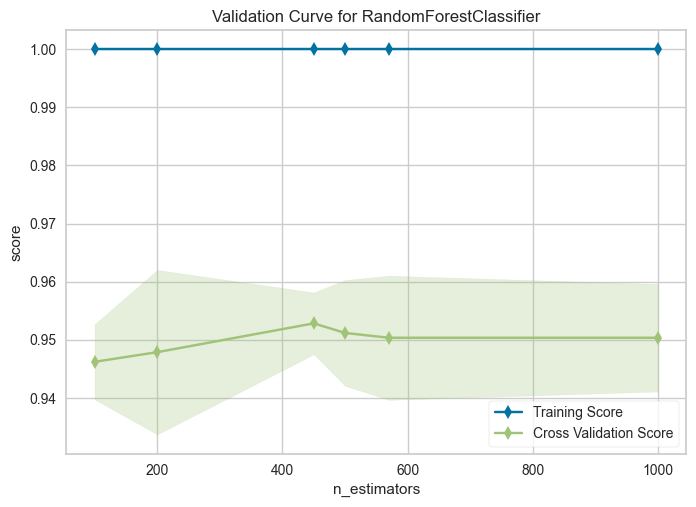

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  570, 1000]),
                scoring='accuracy')


In [18]:
from yellowbrick.model_selection import validation_curve
num_est = [100, 200, 450, 500, 570, 1000]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='n_estimators', param_range=num_est, scoring='accuracy', cv=3))

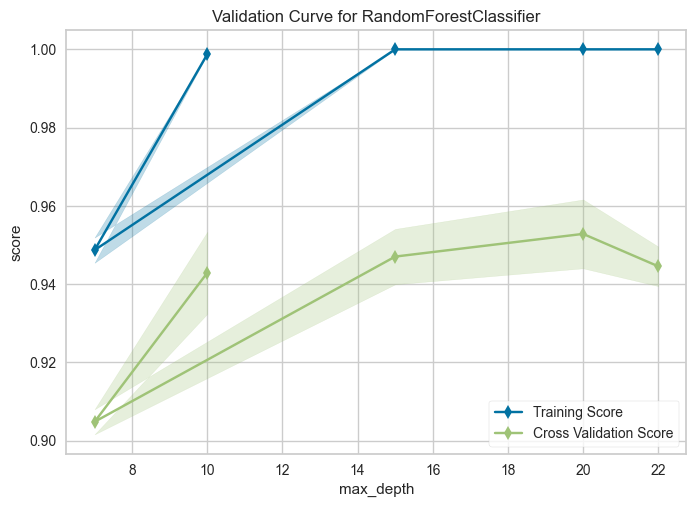

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth', param_range=array([10,  7, 15, 20, 22]),
                scoring='accuracy')


In [19]:
from yellowbrick.model_selection import validation_curve
depth_vals = [10, 7, 15, 20, 22]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='max_depth', param_range=depth_vals, scoring='accuracy', cv=3))

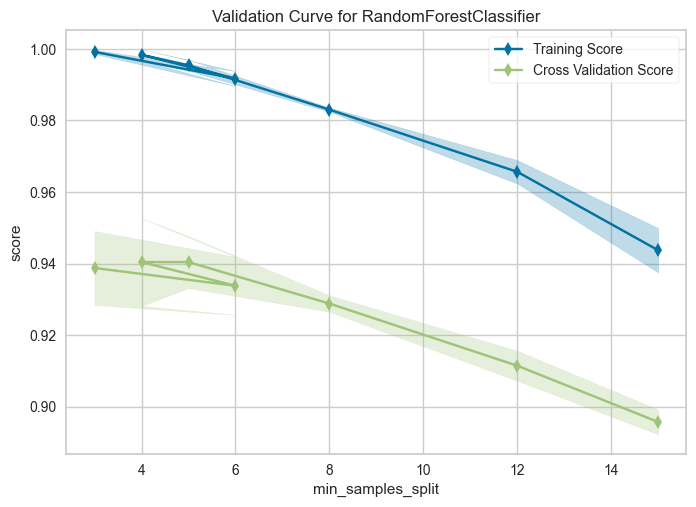

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [21]:
min_samples = [3, 6, 4, 5, 8, 12, 15]
print(validation_curve(RandomForestClassifier(), X=X_train, y=y_train, param_name='min_samples_split', param_range=min_samples, scoring='accuracy', cv=3))

In [22]:
clf2 = RandomForestClassifier(n_estimators = 1000, min_samples_split=3, max_depth=15, random_state=0)
clf2.fit(X_train, y_train)
pred2=clf2.predict(X_test)
print(accuracy_score(pred2, y_test))

0.9653179190751445


In [26]:
feature_scores = pd.Series(clf2.feature_importances_, index=X_train.columns).sort_values(ascending=True)
print(feature_scores)

doors      0.068326
lugboot    0.086017
maint      0.149737
buying     0.173383
persons    0.236649
safety     0.285888
dtype: float64


Text(0.5, 0, 'feature importance score')

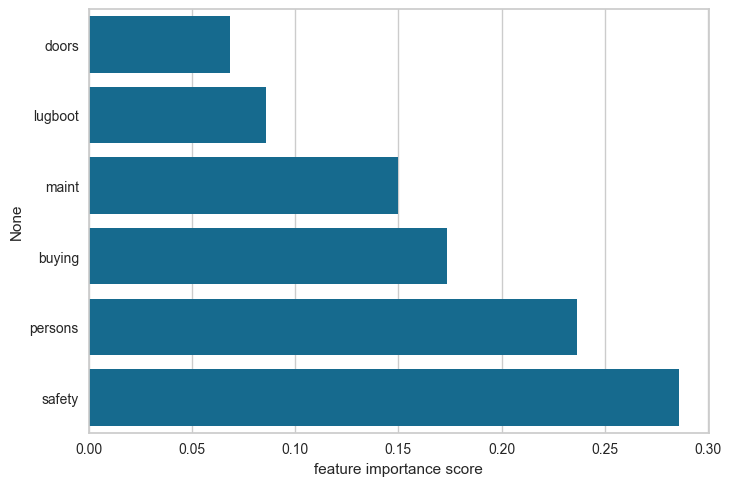

In [27]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('feature importance score')

In [30]:
clf3=RandomForestClassifier()
Xn = df.drop(['doors', 'lugboot', 'maint'], axis=1)
yn = df['class']

X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn, yn, test_size=0.3)
clf3.fit(X_trainn, y_trainn)
new_pred = clf3.predict(X_testn)

In [31]:
accuracy_score(new_pred, y_testn)

1.0